# 상관관계분석(Correlation Analysis)
- 연속 변수로 측정된 두 변수간의 선형관계를 분석하는 기법

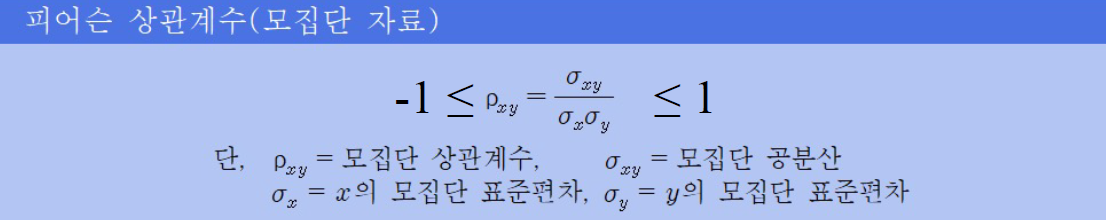

## 상관관계 개념

- X와 Y가 서로 얼마나 밀접하게 선형적 관계를 맺고 있는지를 '상관'이라고 한다.


- 상관관계가 어떤 관련성을 가지고 변화하는지 연관성을 분석하는 것을 상관분석이라고 한다.


- "피어슨 상관계수"를 기본으로 사용하지만, "스피어만 순위 상관계수", "켄달 Tau 상관계수" 등 상황에 맞게 상관계수를 사용할 수 있다.


- 피어슨 상관계수(Pearson correlation coefficient)는 두 변수간의 상관성을 알기 위해 사용되며, 그 값을 r로 나타낸다


- r 값에 대한 해석은 다음과 같다

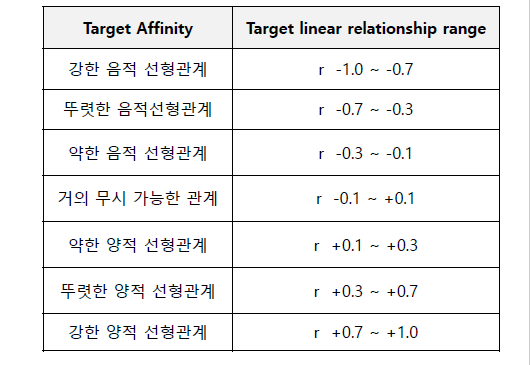

## Ex. 부부의 월평균 의류구입비에 대한 상관관계분석
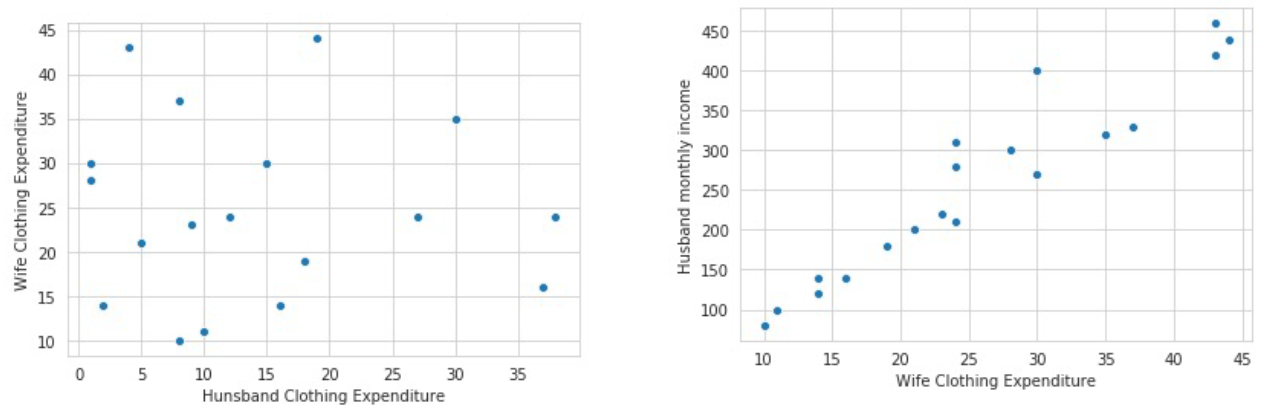

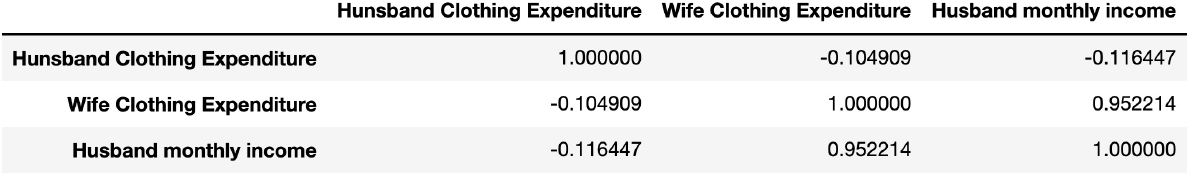

## 상관관계분석을 잘못 사용하는 사례

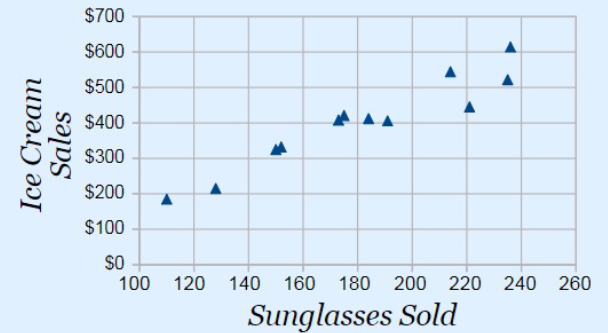

- 아이스크림 판매량과 선글라스의 판매량은 높은 상관관계를 보인다.


- 하지만 두 변수가 인과관계를 가진다고 볼 수는 없다.


- 계절이라는 외부 변수에 의한 상관성이기 때문이다. 


- 항상 분석에서 도메인 지식이 필요한 이유이기도 하다.

# 데이터를 활용한 상관관계 분석
인위적으로 생성된 모바일 앱 다운로드 데이터를 활용하여 분석해본다

### 모바일 앱 다운로드 데이터
- 모바일 앱 스토어에서 상위 5개 카테고리에 앱 다운로드 데이터를 수집


- 새로운 앱을 개발한다면 어떤 유형의 앱에 대한 수요가 많을까?


- 다양한 그래프를 통해 데이터를 탐색해보자


- 상관관계 분석을 통해서 관련이 있는 요소들을 파악해보자

### 데이터 불러오기

In [1]:
import pandas as pd

df=pd.read_csv("app_download.csv")
df

,App,Category,Rating,Reviews,Installs,Price
0,Garden Fruit Legend,FAMILY,4,4289,500000,0.00
1,BlackJack 21 Pro,GAME,4,26744,500000,0.00
2,EO Network,BUSINESS,3,13,1000,0.00
3,Sayers AH,MEDICAL,1,2,50,0.00
4,BD All Results,FAMILY,4,205,50000,0.00
...,...,...,...,...,...,...
498,500 AP World History Questions,FAMILY,4,7,100,9.99
499,SimCity BuildIt,FAMILY,4,4218587,50000000,0.00
500,"CM Flashlight (Compass, SOS)",TOOLS,4,166363,5000000,0.00
501,Blood Pressure Companion,MEDICAL,4,178,1000,0.99


#### Category별 앱 다운로드 횟수 알아보기

In [2]:
df['Category'].value_counts()

FAMILY      208
GAME        111
TOOLS        82
MEDICAL      61
BUSINESS     41
Name: Category, dtype: int64

#### 원 그래프(파이차트)를 활용한 분석

In [3]:
amt = df['Category'].value_counts()

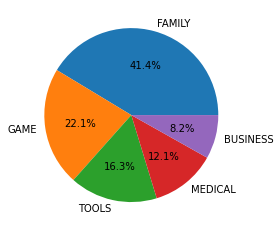

In [6]:
# Pie chart 그리기
import matplotlib.pyplot as plt
plt.pie(amt, labels = ['FAMILY','GAME','TOOLS','MEDICAL','BUSINESS'],autopct='%.1f%%')
plt.show()

#### 막대 그래프를 활용한 분석

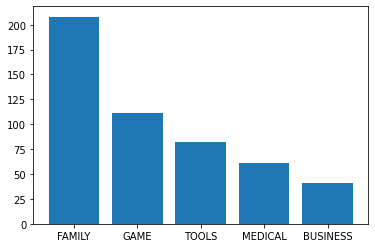

In [7]:
# Category 종류에 따라 막대 그래프 그리기

index = ['FAMILY','GAME','TOOLS','MEDICAL','BUSINESS']
plt.bar(index, amt)
plt.show()

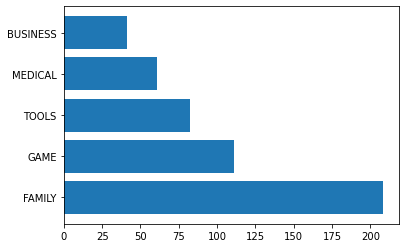

In [8]:
# 수평으로 그래프 그리기
index = ['FAMILY','GAME','TOOLS','MEDICAL','BUSINESS']
plt.barh(index, amt)
plt.show()

<ipython-input-9-28ef08ccdc6a>:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(index, amt, color= 'rgbym')


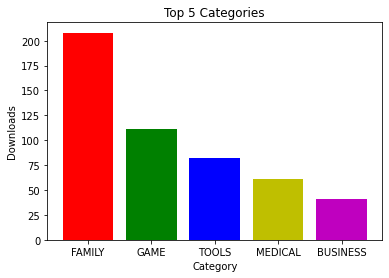

In [9]:
index = ['FAMILY','GAME','TOOLS','MEDICAL','BUSINESS']
plt.bar(index, amt, color= 'rgbym')
plt.title('Top 5 Categories')
plt.xlabel('Category')
plt.ylabel('Downloads')
plt.show()

### 상관관계 분석하기

In [10]:
# 전체 데이터의 상관관계 파악하기
df.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.089770,0.127844,-0.035444
Reviews,0.089770,1.000000,0.748402,-0.050699
Installs,0.127844,0.748402,1.000000,-0.077449
Price,-0.035444,-0.050699,-0.077449,1.000000


In [11]:
# 다운로드 횟수와 평점의 상관관계
df['Installs'].corr(df['Rating'])

0.12784354687542476

In [14]:
# 다운로드 횟수와 리뷰 갯수의 상관관계
df['Installs'].corr(df['Reviews'])

0.7484015482533027

#### FAMILY 카테고리 앱의 상관관계 파악하기

In [15]:
# FAMILY 카테고리 앱만 선택하기
df_family = df[df['Category'] == 'FAMILY']
df_family.head()

,App,Category,Rating,Reviews,Installs,Price
0,Garden Fruit Legend,FAMILY,4,4289,500000,0.0
4,BD All Results,FAMILY,4,205,50000,0.0
8,BkEmu - BK-0010/11M emulator,FAMILY,4,222,10000,0.0
10,POLARIS 2MFG,FAMILY,4,1228,10000,0.0
11,Pyaar Ek Dhoka,FAMILY,5,18,50,0.0


In [18]:
# 다운로드 횟수와 평점의 상관관계
df_family['Installs'].corr(df_family['Rating'])

0.08035191531333594

In [19]:
# 다운로드 횟수와 리뷰 갯수의 상관관계
df_family['Installs'].corr(df_family['Reviews'])

0.8069090067786556

In [20]:
df_family.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.084505,0.080352,0.011514
Reviews,0.084505,1.000000,0.806909,-0.041023
Installs,0.080352,0.806909,1.000000,-0.052766
Price,0.011514,-0.041023,-0.052766,1.000000


#### GAME 카테고리 앱의 상관관계 파악하기

In [21]:
# GAME 카테고리 앱만 선택하기
df_game = df[df['Category'] == 'GAME']
df_game.head()

,App,Category,Rating,Reviews,Installs,Price
1,BlackJack 21 Pro,GAME,4,26744,500000,0.0
6,My OldBoy! Free - GBC Emulator,GAME,4,51787,5000000,0.0
7,ZOMBIE RIPPER,GAME,3,16073,500000,0.0
9,Block Puzzle,GAME,4,59800,5000000,0.0
18,The Visitor: Ep.1 - Kitty Cat Carnage,GAME,4,3017,500000,0.0


In [23]:
# 다운로드 횟수와 평점의 상관관계
df_game['Installs'].corr(df_game['Rating'])

0.10706091462317288

In [24]:
# 다운로드 횟수와 리뷰 갯수의 상관관계
df_game['Installs'].corr(df_game['Reviews'])

0.7381933929033445

#### TOOLS 카테고리 앱의 상관관계 파악하기

In [25]:
# TOOLS 카테고리 앱만 선택하기
df_tools = df[df['Category'] == 'TOOLS']
df_tools.head()

,App,Category,Rating,Reviews,Installs,Price
5,dB Sound Level Meter,TOOLS,3,203,10000,0.0
15,Draw with FP sDraw,TOOLS,4,3268,100000,0.0
22,F-Secure KEY Password manager,TOOLS,4,2588,100000,0.0
23,"CM Security Open VPN - Free, fast unlimited proxy",TOOLS,4,85496,1000000,0.0
28,FlashLight F.Light,TOOLS,4,3943,100000,0.0


In [28]:
# 다운로드 횟수와 평점의 상관관계
df_tools['Installs'].corr(df_tools['Rating'])

0.16014229692080278

In [29]:
# 다운로드 횟수와 리뷰 갯수의 상관관계
df_tools['Installs'].corr(df_tools['Reviews'])

0.9122016000010804

# 해석

- Family 카테고리의 앱이 가장 많이 다운로드되었다. 


- Game 카테고리 앱들이 두번째로 많이 다운로드되었다.


- 각 카테고리 별로 상관관계가 다르므로 이를 고려할 필요가 있다